In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load and clean
csv_path = "/content/financials.csv"
df = pd.read_csv(csv_path)
df = df.drop(columns=['Symbol', 'Name', 'SEC Filings'])
df = df.dropna()
df = pd.get_dummies(df, columns=['Sector'], drop_first=True)

# Prepare data
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = lr_mse ** 0.5
lr_r2 = r2_score(y_test, y_pred)
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R²:", lr_r2)

Linear Regression RMSE: 17.98775309775821
Linear Regression R²: 0.9854743066101797


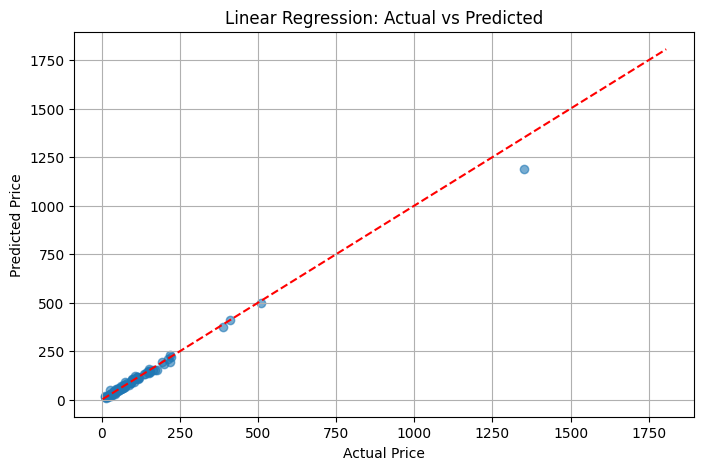

In [5]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()